In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
data = pd.read_csv('data5.csv')

In [3]:
data.head()

,Temperature,Wind,Traffic-Jam,Car Driving y
0,hot,weak,long,no
1,hot,strong,long,no
2,hot,weak,long,yes
3,mild,weak,long,yes
4,cool,weak,short,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Temperature    14 non-null     object
 1   Wind           14 non-null     object
 2   Traffic-Jam    14 non-null     object
 3   Car Driving y  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
#calculate the entropy
entropy_node = 0  
values = data['Car Driving y'].unique() 
for i in values:
    fraction = data['Car Driving y'].value_counts()[i]/len(data['Car Driving y'])  
    entropy_node += -fraction*np.log2(fraction)
print(entropy_node)

0.9402859586706311


In [10]:
eps = np.finfo(float).eps
from numpy import log2 as log
def ent(data, attribute):
    target = data['Car Driving y'].unique() 
    variables = data[attribute].unique()   
    entropy_att = 0
    for i in variables:
        entropy_x = 0
        for target_variable in target:
            num = len(data[attribute][data[attribute] == i]
                      [data['Car Driving y'] == target_variable]) 
            den = len(data[attribute][data[attribute] == i])  
            fraction = num / (den + eps) 
            entropy_x += -fraction * log(fraction + eps) 
        fraction2 = den/len(data)
        entropy_att += -fraction2 * entropy_x  
    return(abs(entropy_att))

In [11]:
#Calculate entrophy for x1, x2 and x3
each_entropy = {k : ent(data,k) 
for k in data.keys()[:-1]}
each_entropy

{'Temperature': 0.9110633930116756,
 'Wind': 0.892158928262361,
 'Traffic-Jam ': 0.7884504573082889}

In [14]:
#Calculate the information gain for x1, x2 and x3
def ii (dataset_ent, attr_ent):
    return(dataset_ent - attr_ent)
infogain = {k : ii(entropy_node, each_entropy[k]) 
      for k in each_entropy}
print(infogain)

{'Temperature': 0.029222565658955535, 'Wind': 0.048127030408270155, 'Traffic-Jam ': 0.15183550136234225}


[Text(279.0, 226.5, 'Traffic-Jam  <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(139.5, 135.9, 'Wind <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(69.75, 45.29999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(209.25, 45.29999999999998, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(418.5, 135.9, 'Wind <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(348.75, 45.29999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(488.25, 45.29999999999998, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

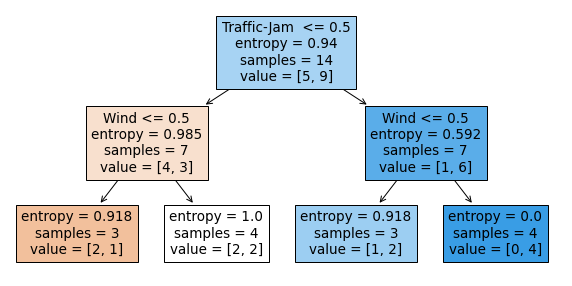

In [31]:
from sklearn.tree import plot_tree
from sklearn import tree
from matplotlib import pyplot as plt
X = data.drop('Car Driving y', axis = 1)
oe = OrdinalEncoder()
X = oe.fit_transform(X)
y = data.iloc[:, -1]
d_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)    
d_tree.fit(X, y)
fig = plt.figure(figsize = (10, 5))
tree.plot_tree(d_tree, feature_names = data.columns, filled  = True)

[Text(482.8846153846154, 475.65000000000003, 'Traffic-Jam  <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(257.53846153846155, 339.75, 'Wind <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(128.76923076923077, 203.85000000000002, 'Temperature <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(64.38461538461539, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(193.15384615384616, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(386.3076923076923, 203.85000000000002, 'Temperature <= 1.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(321.9230769230769, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(450.69230769230774, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(708.2307692307693, 339.75, 'Wind <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(643.8461538461538, 203.85000000000002, 'Temperature <= 1.0\nentropy = 0.918\nsamples = 3\nvalue

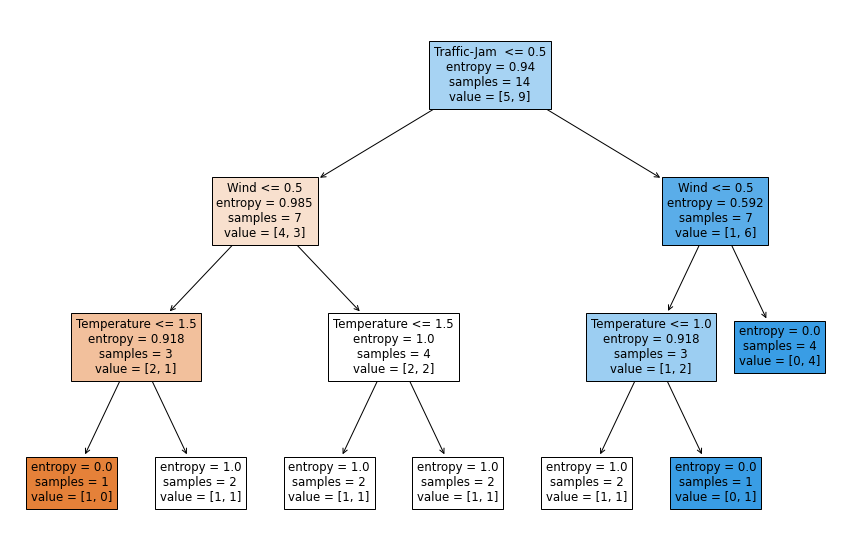

In [42]:
d_tree1 = DecisionTreeClassifier(criterion = 'entropy')    
d_tree1.fit(X, y)
fig1 = plt.figure(figsize = (15, 10))
tree.plot_tree(d_tree1, feature_names=data.columns, filled = True)

In [38]:
d_tree.score(X, y)

0.7142857142857143